In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.max_rows", None)      # show all rows if needed

In [16]:
# CLEANUP DATA

# Read file, skipping the first two metadata rows
df = pd.read_csv("SquishyData.csv", skiprows=[1,2])

# Drop the first 17 columns with unneeded data
df = df.iloc[:, 17:]

# Drop row 12, because of missing data and reset the indexing
df = df.drop(index=12)
df = df.reset_index(drop=True)

df

,Alter,Geschlecht,Bildungsgrad,Bildungsgrad_9_TEXT,Tätigkeit,Technische Affinität,KI Nutzerverhalten,UEQ 1 (Standard)_1,UEQ 1 (Standard)_2,UEQ 1 (Standard)_3,UEQ 1 (Standard)_4,UEQ 1 (Standard)_5,UEQ 1 (Standard)_6,UEQ 1 (Standard)_7,UEQ 1 (Standard)_8,UEQ 1 (Standard)_9,UEQ 1 (Standard)_10,UEQ 1 (Standard)_11,UEQ 1 (Standard)_12,UEQ 1 (Standard)_13,UEQ 1 (Standard)_14,UEQ 1 (Standard)_15,UEQ 1 (Standard)_16,UEQ 1 (Standard)_17,UEQ 1 (Standard)_18,UEQ 1 (Standard)_19,UEQ 1 (Standard)_20,UEQ 1 (Standard)_21,UEQ 1 (Standard)_22,UEQ 1 (Standard)_23,UEQ 1 (Standard)_24,UEQ 1 (Standard)_25,UEQ 1 (Standard)_26,UES 1 (Standard)_1,UES 1 (Standard)_2,UES 1 (Standard)_3,UES 1 (Standard)_4,UES 1 (Standard)_5,UES 1 (Standard)_6,UES 1 (Standard)_7,UES 1 (Standard)_8,UES 1 (Standard)_9,UES 1 (Standard)_10,UES 1 (Standard)_11,UES 1 (Standard)_12,AF 1 (Standard),UEQ 2 (Standard)_1,UEQ 2 (Standard)_2,UEQ 2 (Standard)_3,UEQ 2 (Standard)_4,UEQ 2 (Standard)_5,UEQ 2 (Standard)_6,UEQ 2 (Standard)_7,UEQ 2 (Standard)_8,UEQ 2 (Standard)_9,UEQ 2 (Standard)_10,UEQ 2 (Standard)_11,UEQ 2 (Standard)_12,UEQ 2 (Standard)_13,UEQ 2 (Standard)_14,UEQ 2 (Standard)_15,UEQ 2 (Standard)_16,UEQ 2 (Standard)_17,UEQ 2 (Standard)_18,UEQ 2 (Standard)_19,UEQ 2 (Standard)_20,UEQ 2 (Standard)_21,UEQ 2 (Standard)_22,UEQ 2 (Standard)_23,UEQ 2 (Standard)_24,UEQ 2 (Standard)_25,UEQ 2 (Standard)_26,UES 2 (Standard)_1,UES 2 (Standard)_2,UES 2 (Standard)_3,UES 2 (Standard)_4,UES 2 (Standard)_5,UES 2 (Standard)_6,UES 2 (Standard)_7,UES 2 (Standard)_8,UES 2 (Standard)_9,UES 2 (Standard)_10,UES 2 (Standard)_11,UES 2 (Standard)_12,AF 2 (Standard),UEQ 1 (Squishy)_1,UEQ 1 (Squishy)_2,UEQ 1 (Squishy)_3,UEQ 1 (Squishy)_4,UEQ 1 (Squishy)_5,UEQ 1 (Squishy)_6,UEQ 1 (Squishy)_7,UEQ 1 (Squishy)_8,UEQ 1 (Squishy)_9,UEQ 1 (Squishy)_10,UEQ 1 (Squishy)_11,UEQ 1 (Squishy)_12,UEQ 1 (Squishy)_13,UEQ 1 (Squishy)_14,UEQ 1 (Squishy)_15,UEQ 1 (Squishy)_16,UEQ 1 (Squishy)_17,UEQ 1 (Squishy)_18,UEQ 1 (Squishy)_19,UEQ 1 (Squishy)_20,UEQ 1 (Squishy)_21,UEQ 1 (Squishy)_22,UEQ 1 (Squishy)_23,UEQ 1 (Squishy)_24,UEQ 1 (Squishy)_25,UEQ 1 (Squishy)_26,UES 1 (Squishy)_1,UES 1 (Squishy)_2,UES 1 (Squishy)_3,UES 1 (Squishy)_4,UES 1 (Squishy)_5,UES 1 (Squishy)_6,UES 1 (Squishy)_7,UES 1 (Squishy)_8,UES 1 (Squishy)_9,UES 1 (Squishy)_10,UES 1 (Squishy)_11,UES 1 (Squishy)_12,AF 1 (Squishy),UEQ 2 (Squishy)_1,UEQ 2 (Squishy)_2,UEQ 2 (Squishy)_3,UEQ 2 (Squishy)_4,UEQ 2 (Squishy)_5,UEQ 2 (Squishy)_6,UEQ 2 (Squishy)_7,UEQ 2 (Squishy)_8,UEQ 2 (Squishy)_9,UEQ 2 (Squishy)_10,UEQ 2 (Squishy)_11,UEQ 2 (Squishy)_12,UEQ 2 (Squishy)_13,UEQ 2 (Squishy)_14,UEQ 2 (Squishy)_15,UEQ 2 (Squishy)_16,UEQ 2 (Squishy)_17,UEQ 2 (Squishy)_18,UEQ 2 (Squishy)_19,UEQ 2 (Squishy)_20,UEQ 2 (Squishy)_21,UEQ 2 (Squishy)_22,UEQ 2 (Squishy)_23,UEQ 2 (Squishy)_24,UEQ 2 (Squishy)_25,UEQ 2 (Squishy)_26,UES 2 (Squishy)_1,UES 2 (Squishy)_2,UES 2 (Squishy)_3,UES 2 (Squishy)_4,UES 2 (Squishy)_5,UES 2 (Squishy)_6,UES 2 (Squishy)_7,UES 2 (Squishy)_8,UES 2 (Squishy)_9,UES 2 (Squishy)_10,UES 2 (Squishy)_11,UES 2 (Squishy)_12,AF 2 (Squishy),Durchlauf,Aufgabe 1,Aufgabe 2,Durchlauf 1 Gewählt = Standard,Aufgabe 1 Gewählt,Aufgabe 2 Gewählt,Durchlauf 1 Gewählt = Squishy
0,21,2,5,NaN,Student,2,1,2.0,7.0,6.0,1.0,6.0,2.0,2.0,6.0,3.0,6.0,6.0,4.0,7.0,5.0,1.0,5.0,6.0,6.0,1.0,3.0,1.0,7.0,1.0,5.0,3.0,2.0,3.0,2.0,2.0,5.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,5.0,6.0,6.0,1.0,3.0,2.0,2.0,6.0,1.0,7.0,4.0,4.0,6.0,4.0,1.0,5.0,3.0,6.0,2.0,1.0,2.0,6.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,2.0,4.0,7,6,2,1,3,6,6,5,2,2,6,2,7,6,6,7,2,1,5,5,1,5,1,4,1,6,5,5,5,1,1,3,4,4,4,4,4,5,4,7,7,2,1,2,7,7,6,1,2,6,1,7,6,6,6,2,1,1,5,1,5,2,3,2,6,5,5,5,1,1,3,4,4,4,4,5,5,2,Squishy,Buchcover,Witz,NaN,Buchcover,Witz,NaN
1,24,1,5,NaN,Student,4,2,5.0,6.0,5.0,3.0,3.0,3.0,3.0,6.0,2.0,2.0,4.0,3.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,7.0,1.0,4.0,3.0,2.0,1.0,5.0,1.0,2.0,2.0,1.0,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,6.0,7.0,3.0,2.0,2.0,7.0,7.0,3.0,1.0,5.0,5.0,3.0,6.0,5.0,3.0,6.0,3.0,5.0,4.0,5.0,1.0,6.0,3.0,4.0,3.

In [17]:
# remove all columns except UEQ columns
df_UEQ = df.filter(regex=r'^UEQ', axis=1)

# Convert the scale from 1-7 to -3 to +3
df_UEQ = (df_UEQ - 4).astype(int)

df_UEQ

,UEQ 1 (Standard)_1,UEQ 1 (Standard)_2,UEQ 1 (Standard)_3,UEQ 1 (Standard)_4,UEQ 1 (Standard)_5,UEQ 1 (Standard)_6,UEQ 1 (Standard)_7,UEQ 1 (Standard)_8,UEQ 1 (Standard)_9,UEQ 1 (Standard)_10,UEQ 1 (Standard)_11,UEQ 1 (Standard)_12,UEQ 1 (Standard)_13,UEQ 1 (Standard)_14,UEQ 1 (Standard)_15,UEQ 1 (Standard)_16,UEQ 1 (Standard)_17,UEQ 1 (Standard)_18,UEQ 1 (Standard)_19,UEQ 1 (Standard)_20,UEQ 1 (Standard)_21,UEQ 1 (Standard)_22,UEQ 1 (Standard)_23,UEQ 1 (Standard)_24,UEQ 1 (Standard)_25,UEQ 1 (Standard)_26,UEQ 2 (Standard)_1,UEQ 2 (Standard)_2,UEQ 2 (Standard)_3,UEQ 2 (Standard)_4,UEQ 2 (Standard)_5,UEQ 2 (Standard)_6,UEQ 2 (Standard)_7,UEQ 2 (Standard)_8,UEQ 2 (Standard)_9,UEQ 2 (Standard)_10,UEQ 2 (Standard)_11,UEQ 2 (Standard)_12,UEQ 2 (Standard)_13,UEQ 2 (Standard)_14,UEQ 2 (Standard)_15,UEQ 2 (Standard)_16,UEQ 2 (Standard)_17,UEQ 2 (Standard)_18,UEQ 2 (Standard)_19,UEQ 2 (Standard)_20,UEQ 2 (Standard)_21,UEQ 2 (Standard)_22,UEQ 2 (Standard)_23,UEQ 2 (Standard)_24,UEQ 2 (Standard)_25,UEQ 2 (Standard)_26,UEQ 1 (Squishy)_1,UEQ 1 (Squishy)_2,UEQ 1 (Squishy)_3,UEQ 1 (Squishy)_4,UEQ 1 (Squishy)_5,UEQ 1 (Squishy)_6,UEQ 1 (Squishy)_7,UEQ 1 (Squishy)_8,UEQ 1 (Squishy)_9,UEQ 1 (Squishy)_10,UEQ 1 (Squishy)_11,UEQ 1 (Squishy)_12,UEQ 1 (Squishy)_13,UEQ 1 (Squishy)_14,UEQ 1 (Squishy)_15,UEQ 1 (Squishy)_16,UEQ 1 (Squishy)_17,UEQ 1 (Squishy)_18,UEQ 1 (Squishy)_19,UEQ 1 (Squishy)_20,UEQ 1 (Squishy)_21,UEQ 1 (Squishy)_22,UEQ 1 (Squishy)_23,UEQ 1 (Squishy)_24,UEQ 1 (Squishy)_25,UEQ 1 (Squishy)_26,UEQ 2 (Squishy)_1,UEQ 2 (Squishy)_2,UEQ 2 (Squishy)_3,UEQ 2 (Squishy)_4,UEQ 2 (Squishy)_5,UEQ 2 (Squishy)_6,UEQ 2 (Squishy)_7,UEQ 2 (Squishy)_8,UEQ 2 (Squishy)_9,UEQ 2 (Squishy)_10,UEQ 2 (Squishy)_11,UEQ 2 (Squishy)_12,UEQ 2 (Squishy)_13,UEQ 2 (Squishy)_14,UEQ 2 (Squishy)_15,UEQ 2 (Squishy)_16,UEQ 2 (Squishy)_17,UEQ 2 (Squishy)_18,UEQ 2 (Squishy)_19,UEQ 2 (Squishy)_20,UEQ 2 (Squishy)_21,UEQ 2 (Squishy)_22,UEQ 2 (Squishy)_23,UEQ 2 (Squishy)_24,UEQ 2 (Squishy)_25,UEQ 2 (Squishy)_26
0,-2,3,2,-3,2,-2,-2,2,-1,2,2,0,3,1,-3,1,2,2,-3,-1,-3,3,-3,1,-1,-2,1,2,2,-3,-1,-2,-2,2,-3,3,0,0,2,0,-3,1,-1,2,-2,-3,-2,2,-2,0,0,-2,3,2,-2,-3,-1,2,2,1,-2,-2,2,-2,3,2,2,3,-2,-3,1,1,-3,1,-3,0,-3,2,3,3,-2,-3,-2,3,3,2,-3,-2,2,-3,3,2,2,2,-2,-3,-3,1,-3,1,-2,-1,-2,2
1,1,2,1,-1,-1,-1,-1,2,-2,-2,0,-1,1,0,1,1,-1,-1,-1,3,-3,0,-1,-2,-3,1,2,3,-1,-2,-2,3,3,-1,-3,1,1,-1,2,1,-1,2,-1,1,0,1,-3,2,-1,0,-1,1,2,3,-3,-3,-3,2,3,-1,-3,2,2,-3,3,3,3,3,-2,-2,-1,2,-2,2,-2,-3,-3,2,2,2,-2,-2,-1,0,1,-1,-2,-2,-1,-1,1,0,1,1,-1,-1,-1,2,0,1,-1,-1,-1,1
2,1,0,1,-1,0,1,2,2,1,1,3,0,2,2,0,1,1,-1,0,1,-3,2,-2,-1,-1,2,2,2,-2,-2,1,1,1,-1,-1,0,3,-3,3,1,1,2,-1,-2,0,2,-2,3,-3,-3,-3,2,3,3,-3,-3,-1,2,3,1,0,-2,1,-2,3,3,3,3,-1,-1,0,1,-3,2,-2,-3,-3,3,3,3,-3,-3,-2,3,3,2,1,-3,2,-3,3,3,3,3,-1,-1,3,1,-3,3,-3,-3,-3,3
3,0,3,1,-3,1,-1,-1,3,-3,2,1,-1,3,0,-1,1,0,0,-2,3,-3,3,1,0,-1,-2,-1,2,1,-3,0,-1,-1,3,-3,2,0,-1,3,0,-1,0,0,0,-3,2,-2,2,0,1,0,-1,2,2,-3,-2,0,2,1,3,0,-3,1,-1,2,3,3,3,-1,-2,-3,1,0,1,-3,-2,-3,3,3,3,-2,-2,-1,1,1,3,-2,-3,0,-1,2,3,3,2,-2,-2,-3,1,-2,1,-2,-2,-3,3
4,2,2,-1,-2,-2,0,1,-1,-2,-2,1,-2,2,2,1,1,-1,-1,-2,1,-1,2,-1,-2,-1,1,2,3,-2,-2,-2,2,3,1,-3,-1,2,-1,1,1,1,2,-1,-2,-2,1,-1,1,-1,-2,-1,1,1,-1,-1,1,-2,2,1,1,-1,-2,0,-1,-1,0,1,0,0,0,0,-1,1,-1,1,-1,-1,0,1,2,-2,-1,-2,1,2,-1,-1,-2,-1,-2,1,1,2,1,0,-1,1,1,1,1,-1,-2,-1,1
5,3,3,-1,-3,-2,1,2,0,0,-1,1,-2,2,2,2,2,-1,-2,-1,2,-2,0,-1,-2,-2,-2,3,3,-3,-3,-3,2,2,1,-3,-3,3,-3,3,3,3,3,-3,-3,-2,3,-3,2,-3,-3,-3,2,1,2,-1,0,2,0,-1,0,1,1,-1,1,1,-1,-1,-1,1,0,2,-1,1,1,1,2,2,-1,2,2,-1,-1,0,0,-1,0,1,2,1,-1,2,1,1,1,-1,0,0,0,0,0,0,0,0,0
6,0,3,1,-3,-1,-1,-1,0,0,3,3,0,3,0,-3,0,0,0,-3,0,-3,3,0,0,1,0,3,3,3,-3,-2,0,0,0,0,0,0,0,3,0,-3,0,-3,0,-3,0,-3,3,0,3,3,-3,3,3,-3,-3,-3,3,3,0,0,-2,0,-3,3,1,2,3,-3,-3,0,0,-2,2,0,-3,-3,3,3,3,-3,-3,-3,1,3,1,0,-2,0,-3,3,0,3,3,-3,0,-2,3,-3,2,-3,-3,-3,3
7,1,3,3,-3,-1,-2,-1,0,-3,2,0,0,3,0,-3,0,0,1,0,1,-3,0,-3,2,0,-2,-1,-1,1,0,1,-1,-2,0,1,2,0,1,-1,-1,-1,0,0,0,1,0,1,0,-1,1,1,-2,2,2,-2,-3,-1,1,1,3,-2,-2,2,-2,3,1,2,3,-1,-1,-2,1,-2,2,-2,-1,-2,1,2,2,-2,-3,-1,1,1,2,-1,-2,1,-2,3,1,2,2,-1,0

In [18]:
# List of items to invert
items_to_invert = [3, 4, 5, 9, 10, 12, 17, 18, 19, 21, 23, 24, 25]

# find columns that match those item numbers
cols_to_invert = [col for col in df_UEQ.columns 
                  if col.split('_')[-1].isdigit() and int(col.split('_')[-1]) in items_to_invert]

# invert these columns
df_UEQ[cols_to_invert] = df_UEQ[cols_to_invert] * -1

df_UEQ

,UEQ 1 (Standard)_1,UEQ 1 (Standard)_2,UEQ 1 (Standard)_3,UEQ 1 (Standard)_4,UEQ 1 (Standard)_5,UEQ 1 (Standard)_6,UEQ 1 (Standard)_7,UEQ 1 (Standard)_8,UEQ 1 (Standard)_9,UEQ 1 (Standard)_10,UEQ 1 (Standard)_11,UEQ 1 (Standard)_12,UEQ 1 (Standard)_13,UEQ 1 (Standard)_14,UEQ 1 (Standard)_15,UEQ 1 (Standard)_16,UEQ 1 (Standard)_17,UEQ 1 (Standard)_18,UEQ 1 (Standard)_19,UEQ 1 (Standard)_20,UEQ 1 (Standard)_21,UEQ 1 (Standard)_22,UEQ 1 (Standard)_23,UEQ 1 (Standard)_24,UEQ 1 (Standard)_25,UEQ 1 (Standard)_26,UEQ 2 (Standard)_1,UEQ 2 (Standard)_2,UEQ 2 (Standard)_3,UEQ 2 (Standard)_4,UEQ 2 (Standard)_5,UEQ 2 (Standard)_6,UEQ 2 (Standard)_7,UEQ 2 (Standard)_8,UEQ 2 (Standard)_9,UEQ 2 (Standard)_10,UEQ 2 (Standard)_11,UEQ 2 (Standard)_12,UEQ 2 (Standard)_13,UEQ 2 (Standard)_14,UEQ 2 (Standard)_15,UEQ 2 (Standard)_16,UEQ 2 (Standard)_17,UEQ 2 (Standard)_18,UEQ 2 (Standard)_19,UEQ 2 (Standard)_20,UEQ 2 (Standard)_21,UEQ 2 (Standard)_22,UEQ 2 (Standard)_23,UEQ 2 (Standard)_24,UEQ 2 (Standard)_25,UEQ 2 (Standard)_26,UEQ 1 (Squishy)_1,UEQ 1 (Squishy)_2,UEQ 1 (Squishy)_3,UEQ 1 (Squishy)_4,UEQ 1 (Squishy)_5,UEQ 1 (Squishy)_6,UEQ 1 (Squishy)_7,UEQ 1 (Squishy)_8,UEQ 1 (Squishy)_9,UEQ 1 (Squishy)_10,UEQ 1 (Squishy)_11,UEQ 1 (Squishy)_12,UEQ 1 (Squishy)_13,UEQ 1 (Squishy)_14,UEQ 1 (Squishy)_15,UEQ 1 (Squishy)_16,UEQ 1 (Squishy)_17,UEQ 1 (Squishy)_18,UEQ 1 (Squishy)_19,UEQ 1 (Squishy)_20,UEQ 1 (Squishy)_21,UEQ 1 (Squishy)_22,UEQ 1 (Squishy)_23,UEQ 1 (Squishy)_24,UEQ 1 (Squishy)_25,UEQ 1 (Squishy)_26,UEQ 2 (Squishy)_1,UEQ 2 (Squishy)_2,UEQ 2 (Squishy)_3,UEQ 2 (Squishy)_4,UEQ 2 (Squishy)_5,UEQ 2 (Squishy)_6,UEQ 2 (Squishy)_7,UEQ 2 (Squishy)_8,UEQ 2 (Squishy)_9,UEQ 2 (Squishy)_10,UEQ 2 (Squishy)_11,UEQ 2 (Squishy)_12,UEQ 2 (Squishy)_13,UEQ 2 (Squishy)_14,UEQ 2 (Squishy)_15,UEQ 2 (Squishy)_16,UEQ 2 (Squishy)_17,UEQ 2 (Squishy)_18,UEQ 2 (Squishy)_19,UEQ 2 (Squishy)_20,UEQ 2 (Squishy)_21,UEQ 2 (Squishy)_22,UEQ 2 (Squishy)_23,UEQ 2 (Squishy)_24,UEQ 2 (Squishy)_25,UEQ 2 (Squishy)_26
0,-2,3,-2,3,-2,-2,-2,2,1,-2,2,0,3,1,-3,1,-2,-2,3,-1,3,3,3,-1,1,-2,1,2,-2,3,1,-2,-2,2,3,-3,0,0,2,0,-3,1,1,-2,2,-3,2,2,2,0,0,-2,3,2,2,3,1,2,2,1,2,2,2,2,3,2,2,3,2,3,-1,1,3,1,3,0,3,2,3,3,2,3,2,3,3,2,3,2,2,3,3,2,2,2,2,3,3,1,3,1,2,1,2,2
1,1,2,-1,1,1,-1,-1,2,2,2,0,1,1,0,1,1,1,1,1,3,3,0,1,2,3,1,2,3,1,2,2,3,3,-1,3,-1,1,1,2,1,-1,2,1,-1,0,1,3,2,1,0,1,1,2,3,3,3,3,2,3,-1,3,-2,2,3,3,3,3,3,2,2,1,2,2,2,2,3,3,2,2,2,2,2,1,0,1,-1,2,2,-1,1,1,0,1,1,1,1,1,2,0,1,1,1,1,1
2,1,0,-1,1,0,1,2,2,-1,-1,3,0,2,2,0,1,-1,1,0,1,3,2,2,1,1,2,2,2,2,2,-1,1,1,-1,1,0,3,3,3,1,1,2,1,2,0,2,2,3,3,3,3,2,3,3,3,3,1,2,3,1,0,2,1,2,3,3,3,3,1,1,0,1,3,2,2,3,3,3,3,3,3,3,2,3,3,2,-1,3,2,3,3,3,3,3,1,1,-3,1,3,3,3,3,3,3
3,0,3,-1,3,-1,-1,-1,3,3,-2,1,1,3,0,-1,1,0,0,2,3,3,3,-1,0,1,-2,-1,2,-1,3,0,-1,-1,3,3,-2,0,1,3,0,-1,0,0,0,3,2,2,2,0,-1,0,-1,2,2,3,2,0,2,1,3,0,3,1,1,2,3,3,3,1,2,3,1,0,1,3,2,3,3,3,3,2,2,1,1,1,3,2,3,0,1,2,3,3,2,2,2,3,1,2,1,2,2,3,3
4,2,2,1,2,2,0,1,-1,2,2,1,2,2,2,1,1,1,1,2,1,1,2,1,2,1,1,2,3,2,2,2,2,3,1,3,1,2,1,1,1,1,2,1,2,2,1,1,1,1,2,1,1,1,-1,1,-1,2,2,1,1,1,2,0,1,-1,0,1,0,0,0,0,-1,-1,-1,-1,1,1,0,1,2,2,1,2,1,2,-1,1,2,-1,2,1,1,2,1,0,1,-1,1,-1,1,1,2,1,1
5,3,3,1,3,2,1,2,0,0,1,1,2,2,2,2,2,1,2,1,2,2,0,1,2,2,-2,3,3,3,3,3,2,2,1,3,3,3,3,3,3,3,3,3,3,2,3,3,2,3,3,3,2,1,2,1,0,-2,0,-1,0,-1,-1,-1,-1,1,-1,-1,-1,-1,0,-2,-1,-1,1,-1,-2,-2,-1,2,2,1,1,0,0,-1,0,-1,-2,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0
6,0,3,-1,3,1,-1,-1,0,0,-3,3,0,3,0,-3,0,0,0,3,0,3,3,0,0,-1,0,3,3,-3,3,2,0,0,0,0,0,0,0,3,0,-3,0,3,0,3,0,3,3,0,-3,-3,-3,3,3,3,3,3,3,3,0,0,2,0,3,3,1,2,3,3,3,0,0,2,2,0,3,3,3,3,3,3,3,3,1,3,1,0,2,0,3,3,0,3,3,3,0,2,3,3,2,3,3,3,3
7,1,3,-3,3,1,-2,-1,0,3,-2,0,0,3,0,-3,0,0,-1,0,1,3,0,3,-2,0,-2,-1,-1,-1,0,-1,-1,-2,0,-1,-2,0,-1,-1,-1,-1,0,0,0,-1,0,-1,0,1,-1,-1,-2,2,2,2,3,1,1,1,3,2,2,2,2,3,1,2,3,1,1,2,1,2,2,2,1,2,1,2,2,2,3,1,1,1,2,1,2,1,2,3,1,2,2,1,0,2,0,3,1,2,1,2,1
8,2,2,0,-1,0,1,1,0,0,-1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,2,2,2,2,0,2,1,0,1,1,0,1,1,1,1,1,1,1,0,1,-1,0,1,2,0,1,2,1,2,-2,1,2,1,0,0,1,1,1,1,1,2,2,0,1,-1,0,2,1,2,1,2,2,2,2,2,2,0,2,1,0,0,2,2,1,2,1,1,1,1,1,0,0

In [19]:
# Dictionary to hold new columns
mean_cols = {}

# Calculate mean columns
for i in range(1, 27):
    mean_cols[f'UEQ (Standard)_{i}_mean'] = df_UEQ[[f'UEQ 1 (Standard)_{i}', f'UEQ 2 (Standard)_{i}']].mean(axis=1)
    mean_cols[f'UEQ (Squishy)_{i}_mean'] = df_UEQ[[f'UEQ 1 (Squishy)_{i}', f'UEQ 2 (Squishy)_{i}']].mean(axis=1)

# Combine everything in one go
df_means = pd.DataFrame(mean_cols)

# Optional: reorder columns
standard_cols = [c for c in df_means.columns if 'Standard' in c]
squishy_cols = [c for c in df_means.columns if 'Squishy' in c]
df_means = df_means[standard_cols + squishy_cols]

df_means

,UEQ (Standard)_1_mean,UEQ (Standard)_2_mean,UEQ (Standard)_3_mean,UEQ (Standard)_4_mean,UEQ (Standard)_5_mean,UEQ (Standard)_6_mean,UEQ (Standard)_7_mean,UEQ (Standard)_8_mean,UEQ (Standard)_9_mean,UEQ (Standard)_10_mean,UEQ (Standard)_11_mean,UEQ (Standard)_12_mean,UEQ (Standard)_13_mean,UEQ (Standard)_14_mean,UEQ (Standard)_15_mean,UEQ (Standard)_16_mean,UEQ (Standard)_17_mean,UEQ (Standard)_18_mean,UEQ (Standard)_19_mean,UEQ (Standard)_20_mean,UEQ (Standard)_21_mean,UEQ (Standard)_22_mean,UEQ (Standard)_23_mean,UEQ (Standard)_24_mean,UEQ (Standard)_25_mean,UEQ (Standard)_26_mean,UEQ (Squishy)_1_mean,UEQ (Squishy)_2_mean,UEQ (Squishy)_3_mean,UEQ (Squishy)_4_mean,UEQ (Squishy)_5_mean,UEQ (Squishy)_6_mean,UEQ (Squishy)_7_mean,UEQ (Squishy)_8_mean,UEQ (Squishy)_9_mean,UEQ (Squishy)_10_mean,UEQ (Squishy)_11_mean,UEQ (Squishy)_12_mean,UEQ (Squishy)_13_mean,UEQ (Squishy)_14_mean,UEQ (Squishy)_15_mean,UEQ (Squishy)_16_mean,UEQ (Squishy)_17_mean,UEQ (Squishy)_18_mean,UEQ (Squishy)_19_mean,UEQ (Squishy)_20_mean,UEQ (Squishy)_21_mean,UEQ (Squishy)_22_mean,UEQ (Squishy)_23_mean,UEQ (Squishy)_24_mean,UEQ (Squishy)_25_mean,UEQ (Squishy)_26_mean
0,-0.5,2.5,-2.0,3.0,-0.5,-2.0,-2.0,2.0,2.0,-2.5,1.0,0.0,2.5,0.5,-3.0,1.0,-0.5,-2.0,2.5,-2.0,2.5,2.5,2.5,-0.5,0.5,-2.0,3.0,2.5,2.0,3.0,1.5,2.5,2.5,1.5,2.5,2.0,2.0,2.5,3.0,2.0,2.0,2.5,2.0,3.0,1.0,1.0,3.0,1.0,2.5,0.5,2.5,2.0
1,1.5,2.5,0.0,1.5,1.5,1.0,1.0,0.5,2.5,0.5,0.5,1.0,1.5,0.5,0.0,1.5,1.0,0.0,0.5,2.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.5,2.5,2.5,2.0,1.0,2.0,-1.0,2.5,0.0,0.5,2.0,2.0,1.5,2.0,2.0,1.5,1.5,1.0,2.0,1.0,1.5,1.5,2.0,2.0,1.5
2,1.5,1.0,0.5,1.5,-0.5,1.0,1.5,0.5,0.0,-0.5,3.0,1.5,2.5,1.5,0.5,1.5,0.0,1.5,0.0,1.5,2.5,2.5,2.5,2.0,2.0,2.0,3.0,3.0,3.0,3.0,1.5,2.5,3.0,1.5,-0.5,2.5,1.5,2.5,3.0,3.0,3.0,3.0,1.0,1.0,-1.5,1.0,3.0,2.5,2.5,3.0,3.0,3.0
3,-0.5,2.5,-1.0,3.0,-0.5,-1.0,-1.0,3.0,3.0,-2.0,0.5,1.0,3.0,0.0,-1.0,0.5,0.0,0.0,2.5,2.5,2.5,2.5,-0.5,-0.5,0.5,-1.5,2.5,2.5,2.5,2.0,0.5,1.5,1.0,3.0,1.0,3.0,0.5,1.0,2.0,3.0,3.0,2.5,1.5,2.0,3.0,1.0,1.0,1.0,2.5,2.0,3.0,3.0
4,2.0,2.5,1.5,2.0,2.0,1.0,2.0,0.0,2.5,1.5,1.5,1.5,1.5,1.5,1.0,1.5,1.0,1.5,2.0,1.0,1.0,1.5,1.0,2.0,1.0,1.0,1.0,0.5,1.5,0.0,2.0,1.5,1.5,0.0,1.0,2.0,-0.5,1.5,0.0,0.5,1.5,0.5,0.0,0.5,-0.5,0.0,-1.0,0.0,0.0,1.5,1.0,0.5
5,3.0,3.0,2.0,3.0,2.5,1.5,2.0,0.5,1.5,2.0,2.0,2.5,2.5,2.5,2.5,2.5,2.0,2.5,1.5,2.5,2.5,1.0,2.0,2.5,2.5,0.0,1.5,2.0,1.0,0.5,-1.0,0.0,-1.0,0.0,-1.0,-1.5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,-1.0,-0.5,-0.5,0.5,-0.5,-1.0,-1.0,-0.5
6,1.5,3.0,-2.0,3.0,1.5,-0.5,-0.5,0.0,0.0,-1.5,1.5,0.0,3.0,0.0,-3.0,0.0,1.5,0.0,3.0,0.0,3.0,3.0,0.0,-1.5,-2.0,-1.5,3.0,3.0,3.0,3.0,3.0,2.0,3.0,0.5,0.0,2.0,0.0,3.0,3.0,0.5,2.5,3.0,3.0,1.5,1.0,1.5,2.5,2.0,1.5,3.0,3.0,3.0
7,0.0,1.0,-2.0,1.5,0.0,-1.5,-1.5,0.0,1.0,-2.0,0.0,-0.5,1.0,-0.5,-2.0,0.0,0.0,-0.5,-0.5,0.5,1.0,0.0,2.0,-1.5,-0.5,-2.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.5,1.5,2.0,1.5,2.0,3.0,1.0,2.0,2.5,1.0,0.5,2.0,0.5,2.5,1.5,2.0,1.0,2.0,1.0
8,2.0,2.0,1.0,0.5,0.0,1.5,1.0,0.0,0.5,0.0,0.5,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.5,0.0,0.5,2.0,1.5,2.0,0.0,0.5,2.0,1.0,0.0,0.0,1.5,1.5,1.0,1.5,1.0,1.5,1.5,0.5,1.0,-0.5,0.0,1.0,0.5,1.0,1.0,2.0,1.5
9,1.0,1.5,0.5,2.0,1.0,1.0,0.5,-1.0,2.0,0.5,0.0,1.5,0.5,0.5,1.0,1.0,0.5,0.0,1.5,1.0,0.5,0.0,1.5,1.0,0.5,1.0,1.5,0.5,-1.0,1.0,0.0,0.5,0.0,0.5,2.0,-0.5,0.0,1.0,1.0,0.5,1.5,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [20]:
# Define categories using keywords
scales_keywords = {
    "Attractiveness": ["_1_mean", "_12_mean", "_14_mean", "_16_mean", "_24_mean", "_25_mean"],
    "Perspicuity": ["_2_mean", "_4_mean", "_13_mean", "_21_mean"],
    "Efficiency": ["_9_mean", "_20_mean", "_22_mean", "_23_mean"],
    "Dependability": ["_8_mean", "_11_mean", "_17_mean", "_19_mean"],
    "Stimulation": ["_5_mean", "_6_mean", "_7_mean", "_18_mean"],
    "Novelty": ["_3_mean", "_10_mean", "_15_mean", "_26_mean"]
}

# Initialize new dataframe
df_scores = pd.DataFrame()

# Calculate mean scores for each scale and condition
for scale, keywords in scales_keywords.items():
    # Standard condition
    standard_cols = [col for col in df_means.columns if "Standard" in col and any(k in col for k in keywords)]
    df_scores[f"{scale}_Standard"] = df_means[standard_cols].mean(axis=1)

    # Squishy condition
    squishy_cols = [col for col in df_means.columns if "Squishy" in col and any(k in col for k in keywords)]
    df_scores[f"{scale}_Squishy"] = df_means[squishy_cols].mean(axis=1)

df_scores

,Attractiveness_Standard,Attractiveness_Squishy,Perspicuity_Standard,Perspicuity_Squishy,Efficiency_Standard,Efficiency_Squishy,Dependability_Standard,Dependability_Squishy,Stimulation_Standard,Stimulation_Squishy,Novelty_Standard,Novelty_Squishy
0,0.166667,2.166667,2.625,2.875,1.250,1.750,1.250,1.625,-1.625,2.375,-2.375,2.000
1,1.250000,1.916667,2.125,2.000,1.625,1.875,0.625,0.500,0.875,1.625,0.375,1.500
2,1.666667,2.916667,1.875,3.000,1.625,1.375,0.875,0.625,0.875,2.000,0.625,2.875
3,0.166667,2.333333,2.750,1.875,1.875,1.375,1.500,2.000,-0.625,1.250,-1.375,2.875
4,1.583333,1.000000,1.750,-0.125,1.500,0.250,1.125,-0.250,1.625,1.375,1.250,1.375
5,2.583333,-0.083333,2.750,0.875,1.750,-0.375,1.500,-0.250,2.125,-0.500,1.625,-0.250
6,-0.333333,2.583333,3.000,2.875,0.750,1.250,1.500,1.125,0.125,2.375,-2.000,2.625
7,-0.500000,1.750000,1.125,2.625,0.875,1.375,-0.125,1.750,-0.875,0.875,-2.000,1.750
8,1.000000,1.416667,0.750,1.000,0.625,0.375,0.375,0.375,0.875,1.125,0.625,1.625
9,0.916667,0.916667,1.125,0.875,1.125,0.500,0.250,0.500,0.625,0.375,0.750,0.250


In [21]:
# Compute the mean for each column
mean_scores = df_scores.mean()

mean_sd = df_scores.std()

print("SCORE:")
print(mean_scores)
print("STANDARD DEVIATION:")
print(mean_sd)

SCORE:
Attractiveness_Standard    0.404762
Attractiveness_Squishy     1.863095
Perspicuity_Standard       1.803571
Perspicuity_Squishy        1.803571
Efficiency_Standard        1.366071
Efficiency_Squishy         0.982143
Dependability_Standard     0.883929
Dependability_Squishy      0.821429
Stimulation_Standard      -0.107143
Stimulation_Squishy        1.455357
Novelty_Standard          -0.767857
Novelty_Squishy            1.875000
dtype: float64
STANDARD DEVIATION:
Attractiveness_Standard    1.150927
Attractiveness_Squishy     0.818853
Perspicuity_Standard       0.869784
Perspicuity_Squishy        0.922103
Efficiency_Standard        0.463744
Efficiency_Squishy         0.730281
Dependability_Standard     0.626852
Dependability_Squishy      0.703211
Stimulation_Standard       1.332704
Stimulation_Squishy        0.805043
Novelty_Standard           1.572646
Novelty_Squishy            0.955752
dtype: float64


These are the values from the Squishy bachelor thesis (Thumbs / Squishy):

- Attractiveness:   0.4 / 1.86
- Perspicuity:      1.37 / 0.98
- Efficiency:       1.8 / 1.8
- Dependability:    0.88 / 0.82
- Stimulation:     -0.11 / 1.46
- Novelty:         -0.77 / 1.88

They match for all sub-scales but perspicuity and efficiency.
Who made a mistake?

In [22]:
means = {
    "Attractiveness": [df_scores["Attractiveness_Standard"].mean(),
                       df_scores["Attractiveness_Squishy"].mean()],
    "Perspicuity": [df_scores["Perspicuity_Standard"].mean(),
                    df_scores["Perspicuity_Squishy"].mean()],
    "Efficiency": [df_scores["Efficiency_Standard"].mean(),
                   df_scores["Efficiency_Squishy"].mean()],
    "Dependability": [df_scores["Dependability_Standard"].mean(),
                      df_scores["Dependability_Squishy"].mean()],
    "Stimulation": [df_scores["Stimulation_Standard"].mean(),
                    df_scores["Stimulation_Squishy"].mean()],
    "Novelty": [df_scores["Novelty_Standard"].mean(),
                df_scores["Novelty_Squishy"].mean()]
}

df_means = pd.DataFrame(means, index=["Standard", "Squishy"]).T

benchmark_bounds = {
    "Attractiveness": [0.69, 1.18, 1.58, 1.84, 2.5],
    "Perspicuity": [0.72, 1.2, 1.73, 2.0, 2.5 ],
    "Efficiency": [0.6, 1.05, 1.5, 1.88, 2.5],
    "Dependability": [0.78, 1.14, 1.48, 1.7, 2.5],
    "Stimulation": [0.5, 1.0, 1.35, 1.7, 2.5],
    "Novelty": [0.16, 0.7, 1.12, 1.6, 2.5],
}

colors = ["#F44336", "#F4B400", "#A3C64C", "#3DB143", "#A3E635"]
categories = ["Bad", "Below Average", "Above Average", "Good", "Excellent"]

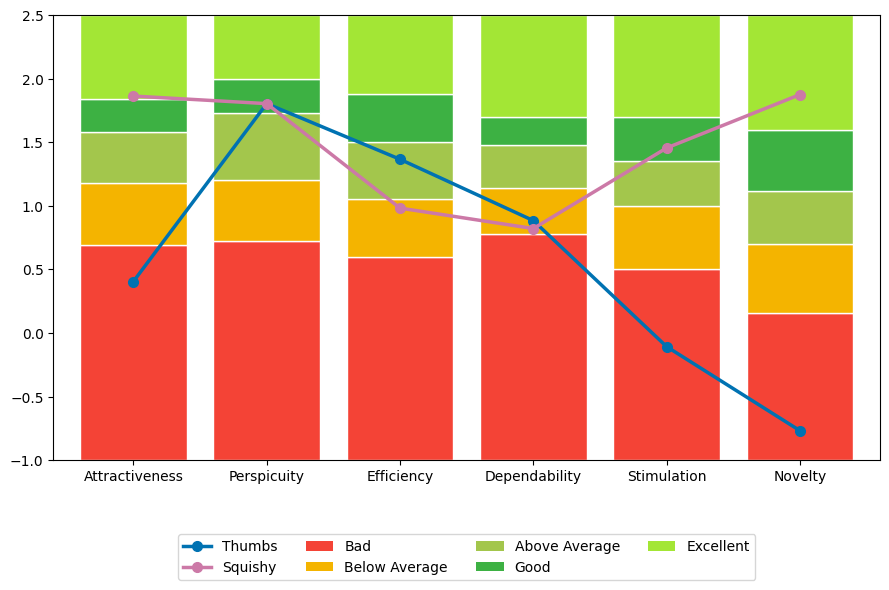

In [29]:
# --- Plot setup ---
fig, ax = plt.subplots(figsize=(9, 6))
x_positions = np.arange(len(df_means.index))
width = 0.8  # width of each bar

for i, scale in enumerate(df_means.index):
    bounds = [-1] + benchmark_bounds[scale]
    for j in range(len(categories)):
        height = bounds[j+1] - bounds[j]
        ax.bar(i, height, width=width, bottom=bounds[j],
               color=colors[j], edgecolor="white", zorder=1)

# --- Plot condition lines ---
ax.plot(x_positions, df_means["Standard"], color="#0072B2", marker="o",
        linewidth=2.5, markersize=7, label="Thumbs", zorder=3)
ax.plot(x_positions, df_means["Squishy"], color="#CC79A7", marker="o",
        linewidth=2.5, markersize=7, label="Squishy", zorder=3)

# --- Formatting ---
ax.set_xticks(x_positions)
ax.set_xticklabels(df_means.index, rotation=0, ha="center")  # horizontal labels
# ax.set_ylabel("Mean Score")
ax.set_ylim(-1, 2.5)
ax.set_xlim(-0.6, len(df_means.index) - 0.4)

# --- Legend for categories ---
for j, cat in enumerate(categories):
    ax.bar(-1, 0, color=colors[j], label=cat)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(),
          ncol=4, bbox_to_anchor=(0.5, -0.15), loc="upper center")

plt.tight_layout()

# Save as PDF
plt.tight_layout()
plt.savefig("output/UEQ_benchmark_plot.pdf", format='pdf', bbox_inches='tight')

plt.show()